## Import:

In [127]:
import pathlib
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier

## Data Import: 

In [128]:
traindata = pd.read_csv("./../../data/titanic_train.csv")
traindata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,565,0,3,"Meanwell, Miss. (Marion Ogden)",female,NaN,0,0,SOTON/O.Q. 392087,8.0500,NaN,S
1,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
2,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
3,612,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S
4,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S
...,...,...,...,...,...,...,...,...,...,...,...,...
752,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
753,254,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,A/5. 3336,16.1000,NaN,S
754,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C
755,480,1,3,"Hirvonen, Miss. Hildur E",female,2.0,0,1,3101298,12.2875,NaN,S


## Filtering:

I only use the Features: Sex, Age, Class and Survivied. 

In [129]:
x_factor = traindata[["Pclass","Sex","Age"]]
y_survivied = traindata[["Survived"]]
x_factor

,Pclass,Sex,Age
0,3,female,NaN
1,1,male,51.0
2,3,female,NaN
3,3,male,NaN
4,2,female,29.0
...,...,...,...
752,1,male,NaN
753,3,male,30.0
754,1,female,24.0
755,3,female,2.0


## Processing 


Changing Sex(Male, Female) to 0,1. And Filling empty spaces with Averages

In [130]:
x_factor.loc[x_factor['Sex'] == 'male', 'Sex'] = 0
x_factor.loc[x_factor['Sex'] == 'female', 'Sex'] = 1

average_age = x_factor['Age'].mean()
x_factor['Age'].fillna(average_age, inplace = True) 

x_factor

/var/folders/f5/kznq8v_n0ps5f262f10t_12w0000gn/T/ipykernel_4136/2318541708.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_factor['Age'].fillna(average_age, inplace = True)


,Pclass,Sex,Age
0,3,1,29.567002
1,1,0,51.000000
2,3,1,29.567002
3,3,0,29.567002
4,2,1,29.000000
...,...,...,...
752,1,0,29.567002
753,3,0,30.000000
754,1,1,24.000000
755,3,1,2.000000


In [131]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_factor, y_survivied, test_size=0.2, stratify=y_survivied)

## Tree

In [132]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier(max_depth = 6)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6)

## Predicitions


In [133]:
y_pred = classifier.predict(x_test)

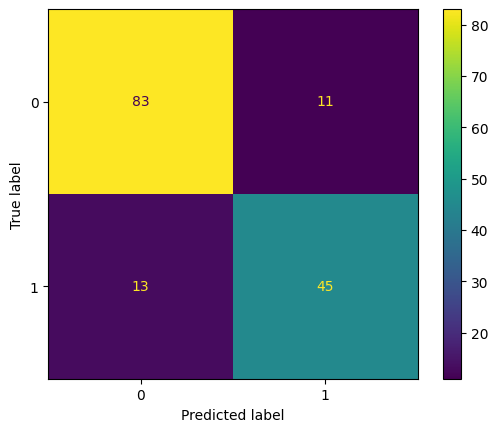

In [134]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test)

## Testing for Accuracy


In [135]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
accuracy_score(y_test, y_pred)

0.8421052631578947

In [136]:
f1_score(y_test, y_pred, average='macro')

0.8315789473684211

In [137]:
matthews_corrcoef(y_test, y_pred)

0.6634814336203915

In [138]:
matthews_corrcoef(y_train, classifier.predict(x_train))

0.6401076092143618

In [139]:
testfile = pd.read_csv("./../../data/titanic_test.csv")

x_factors_test = testfile[['Pclass','Sex','Age']]
y_survived_test = testfile[['Survived']]

x_factors_test.loc[x_factors_test['Sex'] == 'male', 'Sex'] = 0
x_factors_test.loc[x_factors_test['Sex'] == 'female', 'Sex'] = 1

average_age_test = x_factors_test['Age'].mean()
x_factors_test['Age'].fillna(average_age_test, inplace = True)
 
y_pred_test = classifier.predict(x_factors_test)

matthews_corrcoef(y_survived_test, y_pred_test)

/var/folders/f5/kznq8v_n0ps5f262f10t_12w0000gn/T/ipykernel_4136/321681138.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_factors_test['Age'].fillna(average_age_test, inplace = True)


0.5319687835541821